# Nikita Thomas
December 6, 2017

                                            [PART I] DATA EXPLORATION 

In [102]:
import numpy as np
import pandas as pd      # built on top of numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from pandas.api.types import CategoricalDtype 
import random
import warnings
warnings.filterwarnings('ignore') #only used in final version after reviewing all the warning in this file

##### Importing the data into a pandas data frame: 

In [103]:
df = pd.read_csv("diabetes2.csv") 
print(df.head(5))

   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


##### Summary statistics of each column: 

In [104]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


                    Note: The 50% row represents the median value. 

###### New data frame with cleaned data. Variables with zero values that did not make contextual sense were replaced with NaN values: 

In [105]:
df2 = df.copy(deep=True)
# use replace as pure function:
df2['plas']= df['plas'].replace(0,np.NaN)
df2['pres'] = df['pres'].replace(0,np.NaN)
df2['skin'] = df['skin'].replace(0,np.NaN)
df2['insu'] = df['insu'].replace(0,np.NaN)
df2['mass'] = df['mass'].replace(0,np.NaN)
df2.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


   According to domain knowledge, it does not make sense to have 0 values for plasma glucose concentration, diastolic blood pressure, tricep skin fold thickness, insulin, and body mass index. Therefore, these observations are considered as missing data. 

In [106]:
df2.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Number of NaN values for each column: 

In [107]:
df2.isnull().sum(axis=0) # sum along columns

preg       0
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64

##### Percentage of observations that are NaN for each column: 

In [108]:
total_obs = len(df2)
(df2.isnull().sum(axis=0)/ total_obs)*100

preg      0.000000
plas      0.651042
pres      4.557292
skin     29.557292
insu     48.697917
mass      1.432292
pedi      0.000000
age       0.000000
class     0.000000
dtype: float64

In [109]:
df2.info() #dtypes of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     763 non-null float64
pres     733 non-null float64
skin     541 non-null float64
insu     394 non-null float64
mass     757 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


##### Dropping NA values for clean version of the dataset:

In [110]:
print(len(df2))
df2_clean = df2.dropna()
print(len(df2_clean))

768
392


##### Relational scatterplots between all nine variables: 

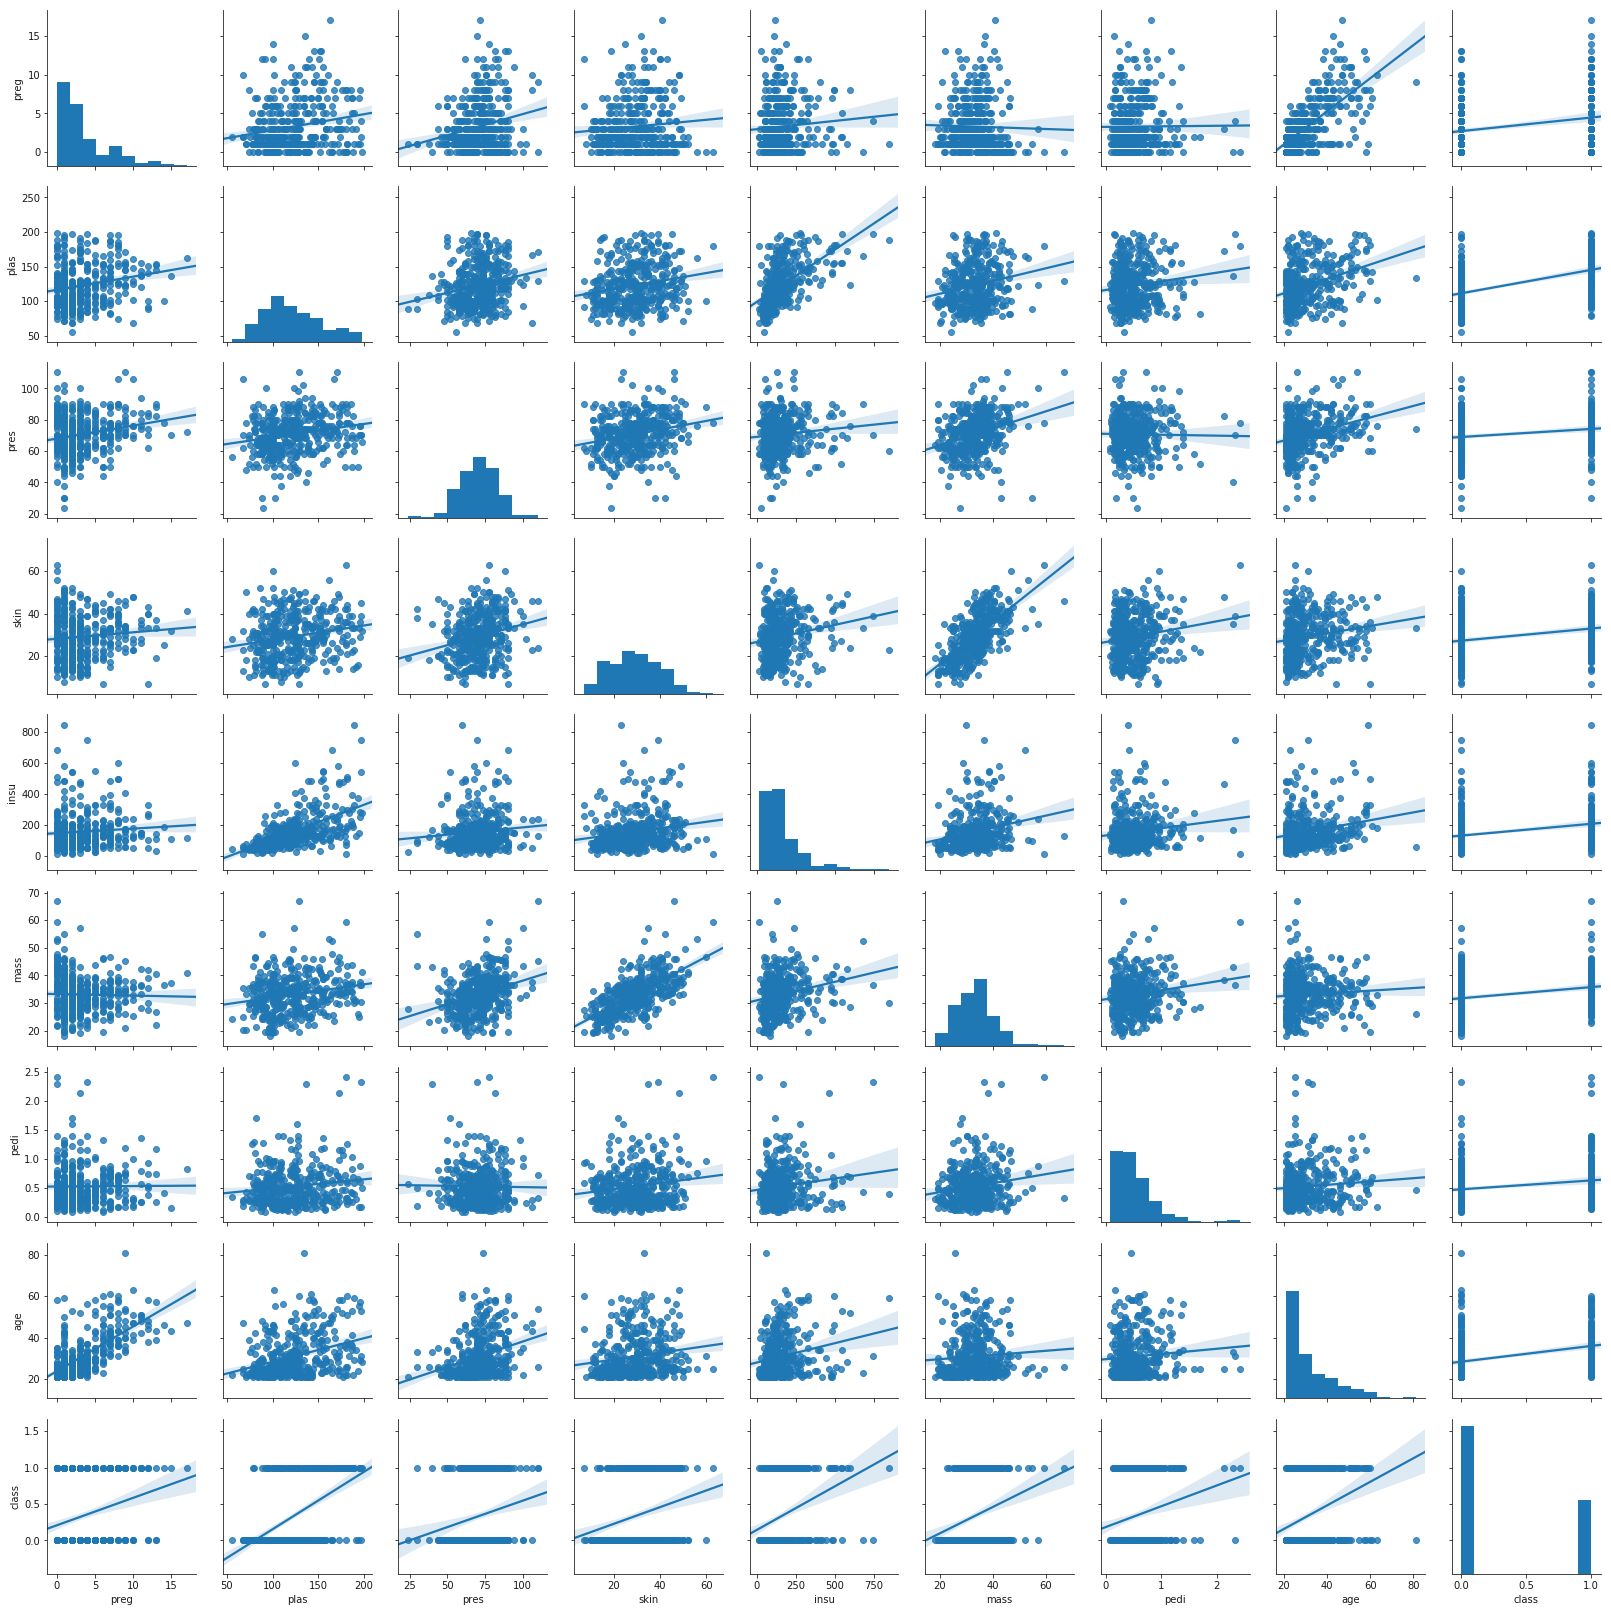

In [111]:
%matplotlib inline 
sns.pairplot(df2_clean, kind="reg")

  According to these pair plots, the positively correlated variables include: 
   - Number of Pregnancies with Age
   - Plasma glucose concentration with Insulin 
   - Skin fold thickness of triceps with body Mass index

##### Closer look into the relationship between age and number of pregnancies: 

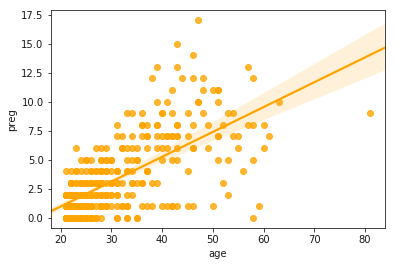

In [112]:
sns.regplot(x="age", y="preg", data=df2_clean, color= "orange")

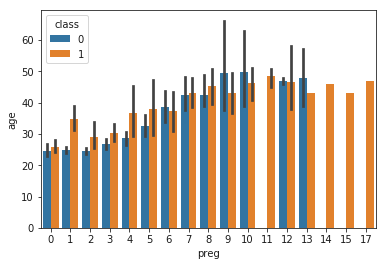

In [113]:
sns.barplot(x="preg",   y="age", hue="class", data=df2_clean)

   In this sample, diabetic patients that have had only one pregnancy tend to be older than non-diabetic patients. 

##### Closer look into the relationship between plasma glucose concentration and insulin: 

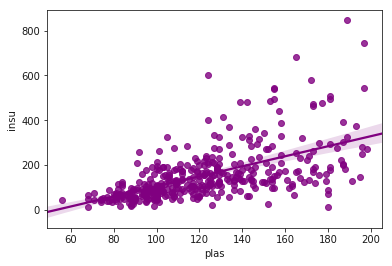

In [114]:
sns.regplot(x="plas", y="insu", data=df2_clean, color= "purple")

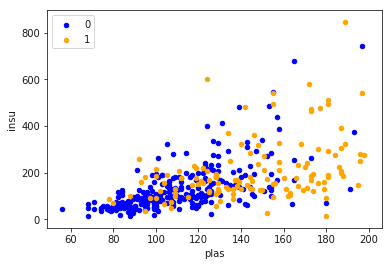

In [115]:
fig, ax = plt.subplots()
colors =   {0:'blue', 1:'orange'} 
grouped = df2_clean.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='plas', y='insu', label=key, color=colors[key])
plt.show()

   Diabetic patients tend to have higher plasma glucose concentration than non-diabetic when comparing insulin levels. 

##### Closer look into the relationship between body mass index and tricep skin fold thickness: 

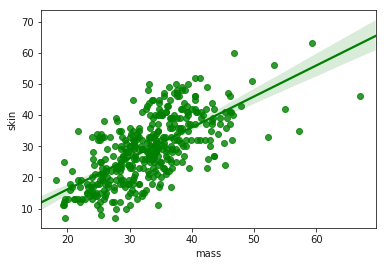

In [116]:
 sns.regplot(x="mass", y="skin", data=df2_clean, color= "green")

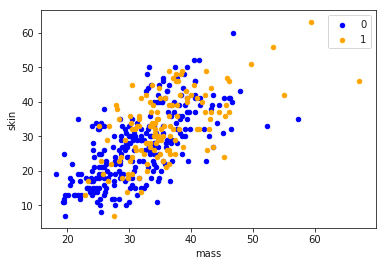

In [117]:
fig, ax = plt.subplots()
colors =   {0:'blue', 1:'orange'} 
grouped = df2_clean.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='mass', y='skin', label=key, color=colors[key])
plt.show()

   Diabetic patients tend to have slightly higher body mass indices and skin fold thickness than non-diabetic patients. 

##### Does the diabetes pedigree function have a visible significant relationship with whether the patient is diabetic (class= 1) or not? 

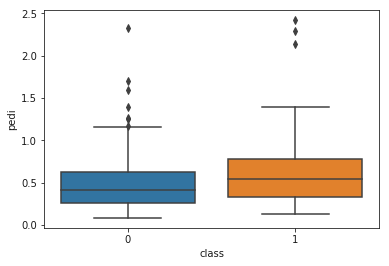

In [118]:
sns.boxplot(x="class", y="pedi", data=df2_clean)

   According to this box plot, the average pedigree function is slightly higher for patients that are diabetic but does not seem significant. 

##### Does diastolic blood pressure have a visible relationship with whether or not the patient is diabetic? 

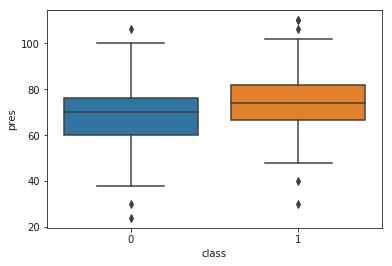

In [119]:
sns.boxplot(x="class", y="pres", data=df2_clean)

According to this boxplot, the average diastolic blood pressure is slightly higher for diabetic patients than non-diabetic. 

### Below are the overall distriubutions plotted for each variable: 

 ##### Age Distribution 

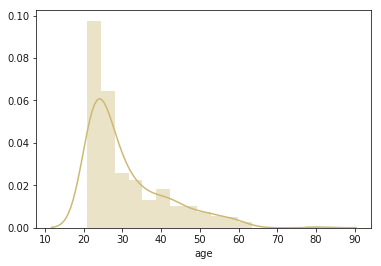

In [120]:
sns.set_color_codes()
sns.distplot(df2_clean.age, color = "y")

        Distribution is skewed right. 

##### Number of Pregnancies Distribution

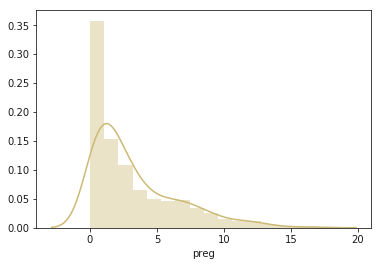

In [121]:
sns.distplot(df2_clean.preg, color = "y")

         Distribution is skewed right. 

##### Plasma Glucose Concentration Distribution

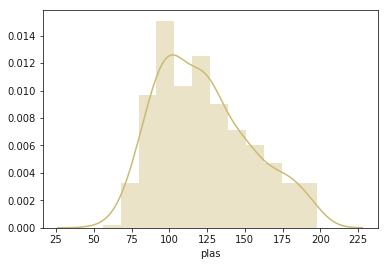

In [122]:
sns.distplot(df2_clean.plas, color = "y")

       Distribution looks close to normal. 

##### Diastolic Blood Pressure Distribution

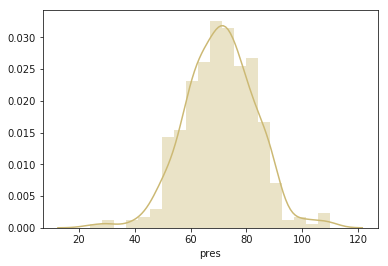

In [123]:
sns.distplot(df2_clean.pres, color= "y")

            Distribution looks normal. 

##### Tricep Skin Fold Distribution

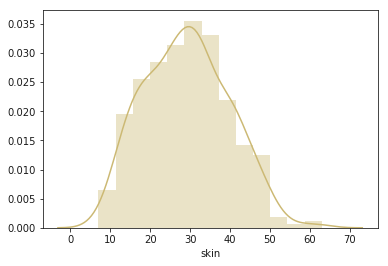

In [124]:
sns.distplot(df2_clean.skin, color = "y")

        Distribution looks close to normal. 

##### Insulin Level Distribution

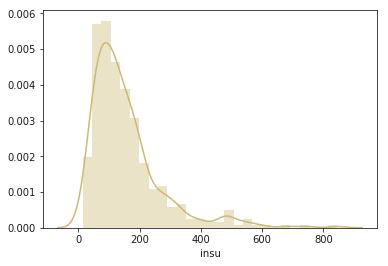

In [125]:
sns.distplot(df2_clean.insu, color = "y")

        Distribution is skewed right. 

##### Body Mass Index Distribution

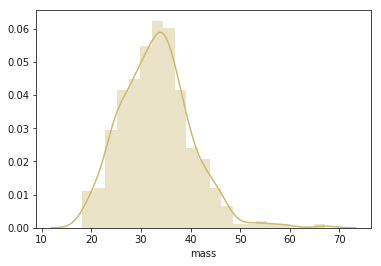

In [126]:
sns.distplot(df2_clean.mass, color= "y")

        Distribution is somewhat normal. 

##### Diabetes Pedigree Distribution

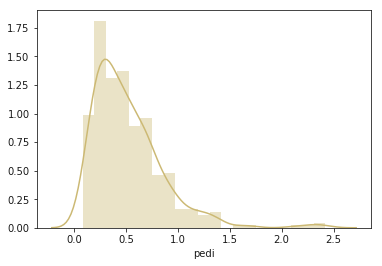

In [127]:
sns.distplot(df2_clean.pedi, color= "y")

        Distribution is skewed right. 

##### Counts of each class in cleaned dataset: 

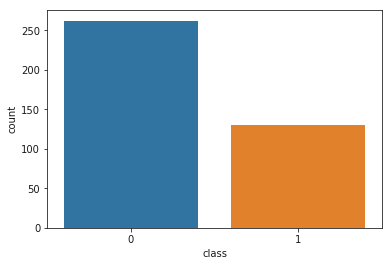

In [128]:
sns.countplot(x="class", data= df2_clean)

The classes are somewhat imbalanced after cleaning the data from all NA values. There are more non-diabetic patients in this dataset than diabetic. 

### Visualizing pairplots by Class

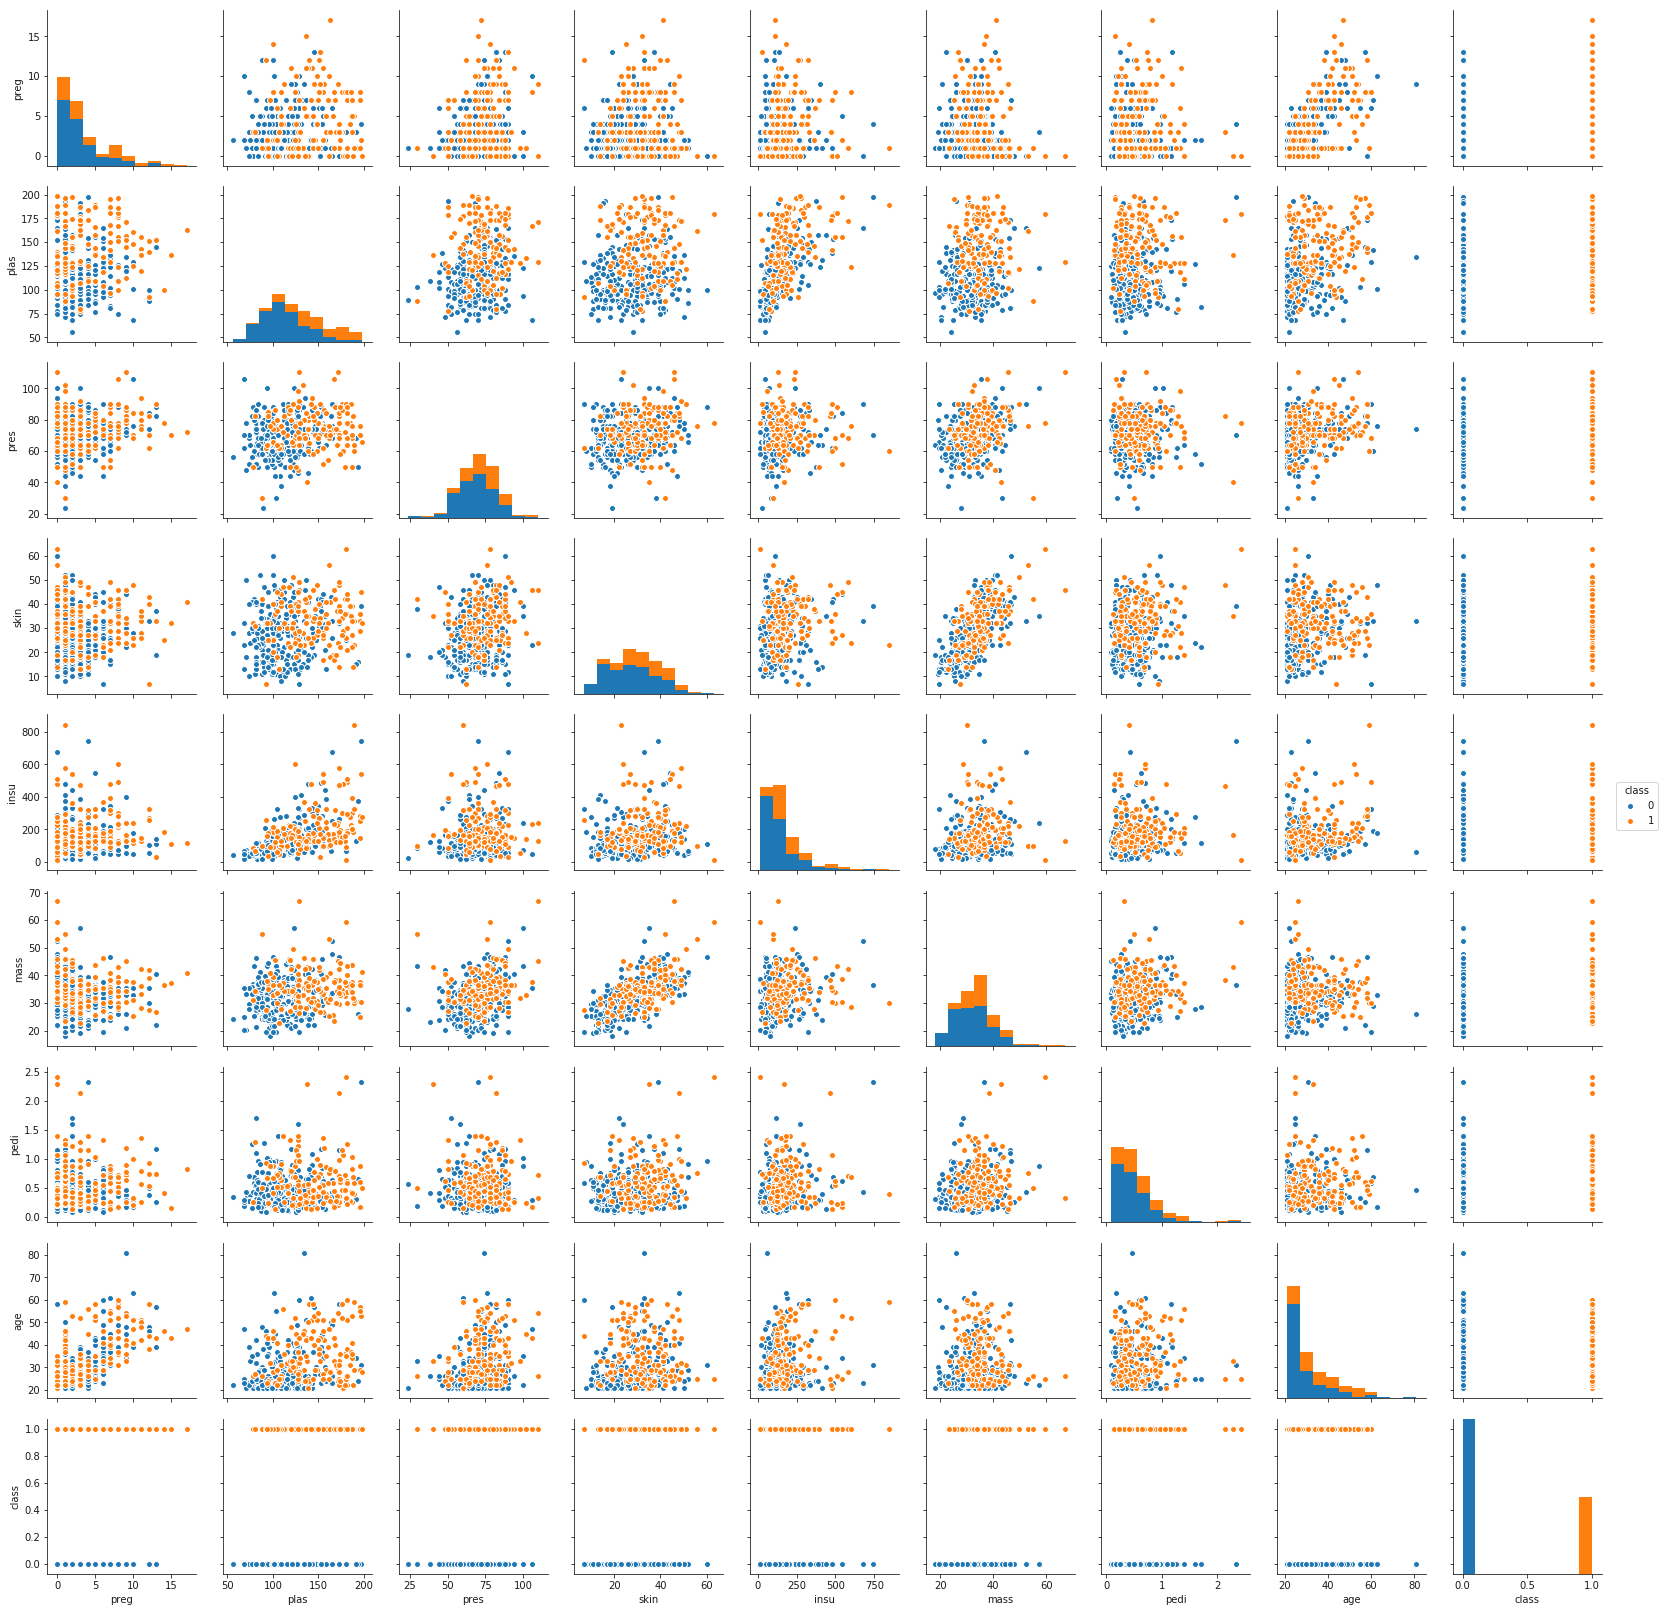

In [129]:
sns.pairplot(df2_clean, hue="class")

                Note: Orange indicates diabetic patients while blue indiates non- diabetic patients. 

                                            [PART 2] MACHINE LEARNING 

As seen in the exploratory analysis portion, when removing the NA values the number of rows reduced from 768 to 392 (approximately 50% of the data was cut). In order to address this issue, two different methods will be tested. The first is to impute the NA values by replacing the NAs with the median value of the given column. The benefit of this method is that all observations are preserved from the dataset. The second is to remove the two columns (skin fold thickness and insulin) that had significantly higher NA values compared to the rest of the features. The benefit of this method is that the data being analyzed are real observed values.  

In [33]:
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## METHOD 1- Imputing NAs

Split the data so that 70% of the data goes towards the training set and 30% goes towards the testing

In [34]:
random.seed(5)
X1 = df2.drop(labels=['class'], axis=1)
y1 = df2.loc[:,'class'] # alt: use iloc for index based data selection
X1_col_names = X1.columns.values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
imp_x = Imputer(missing_values='NaN', strategy='median', axis=0) 
X1_train = imp_x.fit_transform(X1_train)# # fit AND transform training set
X1_test = imp_x.transform(X1_test) # transform test set on scale fitted to training set

Made sure that the class imbalance was not significant. 

In [35]:
total_train = sum(y1_train == 1) #number of diabetic subjects in training set 
print(total_train)
total_test = sum(y1_test == 1) #number of diabetic subjects in testing set 
print(total_test)
proportion = .3 * total_train #checking to see if the weight of diabetic subjects is reasonable between the training and testing sets
if total_test >= proportion: 
    print(True)
else: 
    print(False) 
print(proportion)

184
84
True
55.199999999999996


Ensuring that the dataset includes all observations from the original raw data. 

In [36]:
len(X1_train)+ len(X1_test) # Total number of observations in this method's dataset

768

### Tuning RBF Kernel

In [97]:
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True) # instantiates a SVM classifier
#svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print(svc)
clf = svc.fit(X1_train, y1_train) # trains the classifier on the training set
y_pred = svc.predict(X1_test) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred)
print("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.6363636363636364


In [98]:
cm = confusion_matrix(y1_test, y_pred)
cm

array([[147,   0],
       [ 84,   0]])

According to the confusion matrix, both the true positive and false positives are equal to 0. This indicates that all cases were predicted to be negative (which is one end of the ROC curve). This is not an acceptable model. 

In [101]:
report = classification_report(y1_test, y_pred)
print(report) #for each class prints: precision  recall  f1-score   support

             precision    recall  f1-score   support

          0       0.64      1.00      0.78       147
          1       0.00      0.00      0.00        84

avg / total       0.40      0.64      0.49       231



The above output has very low overall precision and recall values. It is clear that this data needs to be scaled. Precision is the ratio of predicted diabetic patients that are actually diabetic while recall measures the ratio of diabetic patients that were predicted to be diabetic. The f1-score takes both false positives and false negatives into account. It is the weigted average of Precision and Recall. 

#### Sklearn's preprocessing function, MinMaxScalar,  is implemented in order to scale each feature. 

In [40]:
print(X1_test) #compare before/after scaling

[[4.00e+00 1.46e+02 8.50e+01 ... 2.89e+01 1.89e-01 2.70e+01]
 [5.00e+00 1.17e+02 8.00e+01 ... 4.10e+01 3.46e-01 3.70e+01]
 [6.00e+00 1.25e+02 7.60e+01 ... 3.38e+01 1.21e-01 5.40e+01]
 ...
 [4.00e+00 1.16e+02 7.20e+01 ... 2.21e+01 4.63e-01 3.70e+01]
 [0.00e+00 1.47e+02 8.50e+01 ... 4.28e+01 3.75e-01 2.40e+01]
 [8.00e+00 1.09e+02 7.60e+01 ... 2.79e+01 6.40e-01 3.10e+01]]


#### The range of each feature is now between 0 and 1. 

In [41]:
min_max_scaler = MinMaxScaler()
X1_train_minmax = min_max_scaler.fit_transform(X1_train)# fit AND transform training set
X1_test_minmax = min_max_scaler.transform(X1_test)# test set transform only, no fit
X1_test_minmax 

array([[0.23529412, 0.65806452, 0.59782609, ..., 0.25970874, 0.04494863,
        0.1       ],
       [0.29411765, 0.47096774, 0.54347826, ..., 0.55339806, 0.11215753,
        0.26666667],
       [0.35294118, 0.52258065, 0.5       , ..., 0.37864078, 0.01583904,
        0.55      ],
       ...,
       [0.23529412, 0.46451613, 0.45652174, ..., 0.09466019, 0.16224315,
        0.26666667],
       [0.        , 0.66451613, 0.59782609, ..., 0.59708738, 0.12457192,
        0.05      ],
       [0.47058824, 0.41935484, 0.5       , ..., 0.23543689, 0.2380137 ,
        0.16666667]])

New SVC is created with scaled data. 

In [42]:
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True) 
#svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print(svc)
clf = svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax)
print("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.7359307359307359


In [43]:
cm = confusion_matrix(y1_test, y_pred_minmax)
print(cm)
report = classification_report(y1_test, y_pred_minmax)
print(report) #for each class prints: precision  recall  f1-score   support

[[113  34]
 [ 27  57]]
             precision    recall  f1-score   support

          0       0.81      0.77      0.79       147
          1       0.63      0.68      0.65        84

avg / total       0.74      0.74      0.74       231



Prediction accuracy, precision, and recall values are significantly higher and the model is much more reliable. 

### ROC Curve

                Note: fpr= false positive rate and tpr = true positive rate

In [46]:
probas_ = svc.fit(X1_train_minmax, y1_train).predict_proba(X1_test_minmax)
fpr, tpr, thresholds = roc_curve(y1_test, probas_[:, 1])  # use the probas of diabetes(positive cases)
roc_auc = auc(fpr, tpr)
print("thresholds", thresholds[0]) #example of a calculated threshold value
print("probas_", probas_[0]) #example of calculated probability values
print("AUC using predict_proba", roc_auc)

thresholds 0.9602907692484011
probas_ [0.64750611 0.35249389]
AUC using predict_proba 0.8222384191771946


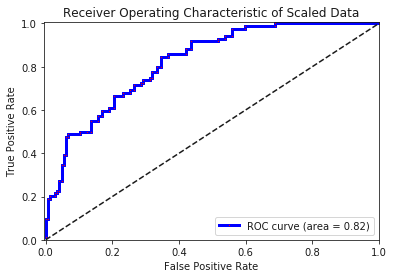

In [47]:
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Scaled Data')
plt.legend(loc="lower right")
plt.show()

ROC curves are used to visualize the accuracy of the model. We want the ROC curve area to be as close to 1 as possible. 

### Implementing a grid search for C and Gamma parameters:

In [48]:
C_range = 10.0 ** np.arange(-2, 4)
gamma_range = [.01, .1, 1, .333, 10, 100]
print(gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[0.01, 0.1, 1, 0.333, 10, 100]


{'gamma': [0.01, 0.1, 1, 0.333, 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [49]:
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), param_grid=param_grid) 
grid.fit(X1_train_minmax, y1_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print("The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma))
grid.best_estimator_

The best C and gamma for rbf is: 1.00000, 0.10000 


SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
best_predict_minmax = grid.best_estimator_.predict(X1_test_minmax)
pTot = accuracy_score(y1_test, best_predict_minmax)
print("Prediction accuracy: ",pTot)

cm = confusion_matrix(y1_test, best_predict_minmax)
print(cm)
report = classification_report(y1_test, best_predict_minmax)
print(report) #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.7619047619047619
[[138   9]
 [ 46  38]]
             precision    recall  f1-score   support

          0       0.75      0.94      0.83       147
          1       0.81      0.45      0.58        84

avg / total       0.77      0.76      0.74       231



### Comparing grid search results to varying C and gamma values

In [51]:
test_svc = SVC(C=best_C, gamma= best_gamma,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax_test = test_svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax_test)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7619047619047619


In [53]:
#Test Case 1
test_svc = SVC(C=1, gamma= .333,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax_test1 = test_svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax_test1)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7532467532467533


In [54]:
# Test Case 2
test_svc = SVC(C=10, gamma= .333,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax_test2 = test_svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax_test2)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7532467532467533


In [55]:
# Test Case 3
test_svc = SVC(C=100, gamma= best_gamma,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax_test3 = test_svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax_test3)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7532467532467533


In [58]:
# Test Case 4
test_svc = SVC(C=best_C, gamma= .01,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax_test4 = test_svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax_test4)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.6363636363636364


In [59]:
# Test Case 5
test_svc = SVC(C=100, gamma= best_gamma,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax_test5 = test_svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax_test5)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7532467532467533


## Tuning Polynomial Kernel

In [67]:
svc = SVC(kernel='poly', degree = 1) # instantiates a SVM classifier
print(svc)
clf = svc.fit(X1_train, y1_train) # trains the classifier on the training set
y_pred = svc.predict(X1_test) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred)
print("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.7532467532467533


In [68]:
svc = SVC(kernel='poly', degree = 2) # instantiates a SVM classifier
print(svc)
clf = svc.fit(X1_train, y1_train) # trains the classifier on the training set
y_pred = svc.predict(X1_test) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred)
print("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.7359307359307359


In [69]:
cm = confusion_matrix(y1_test, y_pred)
cm

array([[123,  24],
       [ 37,  47]])

In [70]:
report = classification_report(y1_test, y_pred)
print(report) #for each class prints: precision  recall  f1-score   support

             precision    recall  f1-score   support

          0       0.77      0.84      0.80       147
          1       0.66      0.56      0.61        84

avg / total       0.73      0.74      0.73       231



In [71]:
print(X1_test) #compare before/after scaling

[[4.00e+00 1.46e+02 8.50e+01 ... 2.89e+01 1.89e-01 2.70e+01]
 [5.00e+00 1.17e+02 8.00e+01 ... 4.10e+01 3.46e-01 3.70e+01]
 [6.00e+00 1.25e+02 7.60e+01 ... 3.38e+01 1.21e-01 5.40e+01]
 ...
 [4.00e+00 1.16e+02 7.20e+01 ... 2.21e+01 4.63e-01 3.70e+01]
 [0.00e+00 1.47e+02 8.50e+01 ... 4.28e+01 3.75e-01 2.40e+01]
 [8.00e+00 1.09e+02 7.60e+01 ... 2.79e+01 6.40e-01 3.10e+01]]


In [72]:
min_max_scaler = MinMaxScaler()
X1_train_minmax = min_max_scaler.fit_transform(X1_train)# fit AND transform training set
X1_test_minmax = min_max_scaler.transform(X1_test)# test set transform only, no fit
X1_test_minmax 

array([[0.23529412, 0.65806452, 0.59782609, ..., 0.25970874, 0.04494863,
        0.1       ],
       [0.29411765, 0.47096774, 0.54347826, ..., 0.55339806, 0.11215753,
        0.26666667],
       [0.35294118, 0.52258065, 0.5       , ..., 0.37864078, 0.01583904,
        0.55      ],
       ...,
       [0.23529412, 0.46451613, 0.45652174, ..., 0.09466019, 0.16224315,
        0.26666667],
       [0.        , 0.66451613, 0.59782609, ..., 0.59708738, 0.12457192,
        0.05      ],
       [0.47058824, 0.41935484, 0.5       , ..., 0.23543689, 0.2380137 ,
        0.16666667]])

In [73]:
svc = SVC(kernel='poly', degree = 2, probability=True) 
print(svc)
clf = svc.fit(X1_train_minmax, y1_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X1_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y1_test, y_pred_minmax)
print("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.6536796536796536


In [74]:
cm = confusion_matrix(y1_test, y_pred_minmax)
print(cm)
report = classification_report(y1_test, y_pred_minmax)
print(report) #for each class prints: precision  recall  f1-score   support

[[147   0]
 [ 80   4]]
             precision    recall  f1-score   support

          0       0.65      1.00      0.79       147
          1       1.00      0.05      0.09        84

avg / total       0.78      0.65      0.53       231



Although precision increased after scaling the features, the overall accuracy of the polynomial kernel with a degree of 2 decreased after scaling. Even before scaling, the accuracy score was lower than the best rbf kernel model. 

In [75]:
probas_ = svc.fit(X1_train_minmax, y1_train).predict_proba(X1_test_minmax)
fpr, tpr, thresholds = roc_curve(y1_test, probas_[:, 1])  # use the probs of (smoke), not of nonsmoking
roc_auc = auc(fpr, tpr)
print("AUC using predict_proba", roc_auc)

AUC using predict_proba 0.8186750890832524


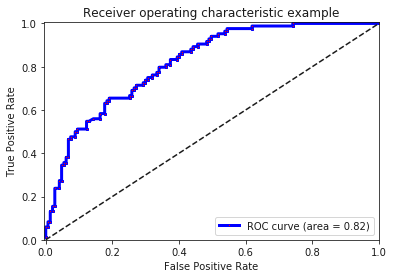

In [76]:
%matplotlib inline
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

There does not seem to be much difference between both kernels' ROC curve areas. Therefore, it is important to have multiple forms of model performance metrics to really see the differences. 

### Models for best  precision and recall values (adapted from scikit learn example): 

In [58]:
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}, 
                   {'kernel': ['poly'], 'degree': [1,2]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X1_train, y1_train)

    print("Best parameters set found:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed report with F1 score:")
    print()
    y_true, y_pred = y1_test, clf.predict(X1_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.729 (+/-0.036) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.788 (+/-0.064) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.671 (+/-0.072) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.749 (+/-0.033) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.640 (+/-0.121) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.712 (+/-0.049) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.581 (+/-0.067) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.689 (+/-0.078) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.772 (+/-0.043) for {'degree': 1, 'kernel': 'poly'}
0.738 (+/-0.111) for {'degree': 2, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

       

# Method 2- Dropping Columns

Decided to drop variables that had high NA values. In this dataset, skin thickness and insulin level had significantly more NA values  than any other variable. After dropping those columns, I removed the remaining rows with NA values and split the data into 70% training and 30% testing. 

In [77]:
random.seed(5)
df3= df2.drop(labels=['skin', 'insu'], axis=1)
df3_clean= df3.dropna() #Total observations are now 724
X2 = df3_clean.drop(labels=['class'], axis=1)
y2 = df3_clean.loc[:,'class'] # alt: use iloc for index based data selection
X2_col_names = X2.columns.values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [78]:
total_train = sum(y2_train == 1) #number of diabetic subjects in training set 
print(total_train)
total_test = sum(y2_test == 1) #number of diabetic subjects in testing set 
print(total_test)
proportion = .3 * total_train #checking to see if the weight of diabetic subjects is reasonable between the training and testing sets
if total_test >= proportion: 
    print(True)
else: 
    print(False) 
print(proportion)

176
73
True
52.8


In [79]:
len(X2_train)+ len(X2_test) # Total number of observations in this method's dataset

724

### RBF Kernel with Scaled Features 

In [80]:
min_max_scaler = MinMaxScaler()
X2_train_minmax = min_max_scaler.fit_transform(X2_train)# fit AND transform training set
X2_test_minmax = min_max_scaler.transform(X2_test)# test set transform only, no fit
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True) 
#svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print(svc)
clf = svc.fit(X2_train_minmax, y2_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X2_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y2_test, y_pred_minmax)
print("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.7660550458715596


In [81]:
cm = confusion_matrix(y2_test, y_pred_minmax)
print(cm)
report = classification_report(y2_test, y_pred_minmax)
print(report) #for each class prints: precision  recall  f1-score   support

[[113  32]
 [ 19  54]]
             precision    recall  f1-score   support

          0       0.86      0.78      0.82       145
          1       0.63      0.74      0.68        73

avg / total       0.78      0.77      0.77       218



In [82]:
C_range = 10.0 ** np.arange(-2, 4)
gamma_range = [.01, .1, 1, .333, 10, 100]
param_grid = dict(gamma=gamma_range, C=C_range)
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), param_grid=param_grid) 
grid.fit(X2_train_minmax, y2_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print("The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma))

The best C and gamma for rbf is: 10.00000, 0.33300 


In [83]:
best_predict_minmax = grid.best_estimator_.predict(X2_test_minmax)
pTot = accuracy_score(y2_test, best_predict_minmax)
print("Prediction accuracy: ",pTot)

cm = confusion_matrix(y2_test, best_predict_minmax)
print(cm)
report = classification_report(y2_test, best_predict_minmax)
print(report) #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.7844036697247706
[[130  15]
 [ 32  41]]
             precision    recall  f1-score   support

          0       0.80      0.90      0.85       145
          1       0.73      0.56      0.64        73

avg / total       0.78      0.78      0.78       218



### Polynomial Kernel with Scaled Features

In [89]:
svc = SVC(kernel='poly', degree = 2, probability=True) 
clf = svc.fit(X2_train_minmax, y2_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X2_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y2_test, y_pred_minmax)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7018348623853211


In [88]:
svc = SVC(kernel='poly', degree = 1, probability=True) 
clf = svc.fit(X2_train_minmax, y2_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X2_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y2_test, y_pred_minmax)
print("Prediction accuracy: ",pTot)

Prediction accuracy:  0.8073394495412844


In this method, higher prediction accuracy occurs when the degree is set to 1. 

In [90]:
cm = confusion_matrix(y2_test, y_pred_minmax)
print(cm)
report = classification_report(y2_test, y_pred_minmax)
print(report) #for each class prints: precision  recall  f1-score   support

[[142   3]
 [ 62  11]]
             precision    recall  f1-score   support

          0       0.70      0.98      0.81       145
          1       0.79      0.15      0.25        73

avg / total       0.73      0.70      0.63       218



#### Overall, the dropping columns with high NA values method produces higher prediction accuracy than the previous imputing NA values method. 

### Models for best  precision and recall values:

In [95]:
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}, 
                   {'kernel': ['poly'], 'degree': [1,2]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X2_train, y2_train)

    print("Best parameters set found:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed report with F1 score:")
    print()
    y_true, y_pred = y2_test, clf.predict(X2_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found:

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores:

0.736 (+/-0.081) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.750 (+/-0.075) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.734 (+/-0.055) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.745 (+/-0.062) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.666 (+/-0.067) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.748 (+/-0.066) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.647 (+/-0.026) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.735 (+/-0.075) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.742 (+/-0.064) for {'degree': 1, 'kernel': 'poly'}
0.749 (+/-0.057) for {'degree': 2, 'kernel': 'poly'}

Detailed report with F1 score:

             precision    recall  f1-score   support

          0       0.81      0.91      0.86       145
          1       0.76      0.58      0.66